# Applications to statistical analysis : latent semantic analysis

This chapter essentially provides an application of the spectral theorem to data analysis 
with a focus on Latent Semantic Analysis, a foundational method of textual data analysis. 

The methods described here are mainly used to get low rank representations of multivariate high dimensional statistical data.
High dimensional data is the classical kind of data used in language modeling.
Low rank representations are used to visualize and/or to smooth this kind of data


## Linear algebra for descriptive multivariate statistics 

Recall that a standard data set such as the *Iris*  is naturally viewed as a matrix

|        | Sepal Length | Sepal Width |  Petal Length | Petal Width |
| --- |         ---       |       ---       |         ---        |    ---         |
|    1  |           5.1      |        3.5       |          1.4        |      0.2        |
|    2  |         4.9        |        3.0       |          1.4        |      0.2        |
|    3  |         4.7        |        3.2       |           1.3       |      0.2        |
|    4  |          4.6       |        3.1       |           1.5       |      0.2        |

$$
\mathbf{X}
\begin{bmatrix}
| & | & | & |\\
    \mathbf{x}_1&\mathbf{x}_2 & \mathbf{x}_3 & \mathbf{x}_4\\
| & | & | & |
\end{bmatrix}	
$$

where each column $\mathbf{x}_i$ represents a statistical variable.
Let us start by relating common statistical summary metrics to linear algebra.

- The **mean vector** of a vector $\mathbf{x} \in \mathbb{R}^n$ is the vector:

$$
\bar{\mathbf{x}} = \mu \mathbf{1}_n \qquad (\mu = \frac{1}{n}\sum_{i=1}^n x_i) 
$$

- Let $\mathbf{x}_c \in \mathbb{R}^n$  be the centered vector :

$$
\mathbf{x}_c =  \mathbf{x} - \bar{\mathbf{x}}
$$

- The **variance** of the vector $\mathbf{x}$ is the scalar:

$$
\text{var}(\mathbf{x}) = \frac{1}{n}\mathbf{x}_c^\top \mathbf{x}_c
$$

- The **standard deviation** of the vector  $\mathbf{x}$ is as scalar proportional to the norm of $\mathbf{x}_c$:

$$
\sigma(\mathbf{x}) =  \frac{1}{n}  || \mathbf{x}_c ||
$$

- The **covariance** of vectors  $\mathbf{x} \in \mathbb{R}^n$  and  $\mathbf{y} \in \mathbb{R}^n$ is proportional to the dot product of $\mathbf{x}_c$ and $\mathbf{y}_c$:

$$
\text{cov}(\mathbf{x}, \mathbf{y}) =  \frac{1}{n} \mathbf{x}_c^\top \mathbf{y}_c
$$

- The **correlation** of vectors  $\mathbf{x} \in \mathbb{R}^n$  and  $\mathbf{y} \in \mathbb{R}^n$ 

$$
\text{cor}(\mathbf{x},\mathbf{y}) = \frac{\mathbf{x}_c^\top \mathbf{y}_c}{ ||\mathbf{x}_c|| \, ||\mathbf{y}_c || } 
$$

```{admonition} Tip
:class: tip

In practice it is often practical to compute correlations from centered unit vectors $\mathbf{x}_u$ with norm $||\mathbf{x}_u || = 1$. In this case computing the correlation reduces to computing a dot product:

$$
\text{cor}(\mathbf{x},\mathbf{y}) = \frac{\mathbf{x}^\top_u \mathbf{y}_u}{||\mathbf{x}_u||\, ||\mathbf{y}_u || }
= \frac{\mathbf{x}^\top_u \mathbf{y}_u}{1 \times 1} = \mathbf{x}^\top_u \mathbf{y}_u
$$

Such vectors are obtained from a data matrix by centering and normalizing:

$$
\mathbf{x}_u = \frac{\mathbf{x} - \bar{\mathbf{x}}}{||\mathbf{x} - \bar{\mathbf{x}}||} =  \frac{\mathbf{x} - \bar{\mathbf{x}}}{||\mathbf{x}||}
$$
```



```{note} 
There is an important connection between descriptive statistics and euclidean geometry. The correlation coefficient 
is nothing else than a cosine measure between two centered data vectors while the standard deviation is proportional to the norm of a data vector. Further connections can be established, for instance to say that two data vectors are statistically independent is equivalent to say that the two vectors are orthogonal.
```

## Covariance matrices

Observe that we can compute the covariance between all couples of data column vectors $\mathbf{x}_1 \ldots \mathbf{x}_m$ by a single matrix product.
Let $\mathbf{X}\in \mathbb{R}^{n\times m}$ then the resulting covariance matrix is:

$$
\frac{1}{n}
\mathbf{X}^\top\mathbf{X} = 
\frac{1}{n}
\begin{bmatrix}
\mathbf{x}^\top_1 \mathbf{x}_1& \cdots & \mathbf{x}_1^\top \mathbf{x}_m \\
\vdots & \ddots & \vdots\\
\mathbf{x}^\top_m \mathbf{x}_1&\cdots&\mathbf{x}^\top_m \mathbf{x}_m
\end{bmatrix}
$$

which is a symmetric square matrix of size $m\times m$.


```{admonition} Example
:class: tip

For the full [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) data set, the covariance matrix is a $4\times 4$ matrix summarizing
the scatter plot given in the figure below:

$$
\frac{1}{m}
\mathbf{X}^\top\mathbf{X} = 
\begin{bmatrix}
0.68 & -0.04 &  1.27 & 0.51\\
-0.04& 0.18  & -0.32 & -0.12\\
1.27 & -0.32 &  3.11 &  1.29\\
0.51 & -0.12 &  1.29 & 0.58
\end{bmatrix}
$$

the diagonal of the covariance matrix stores the variance of each data column
```

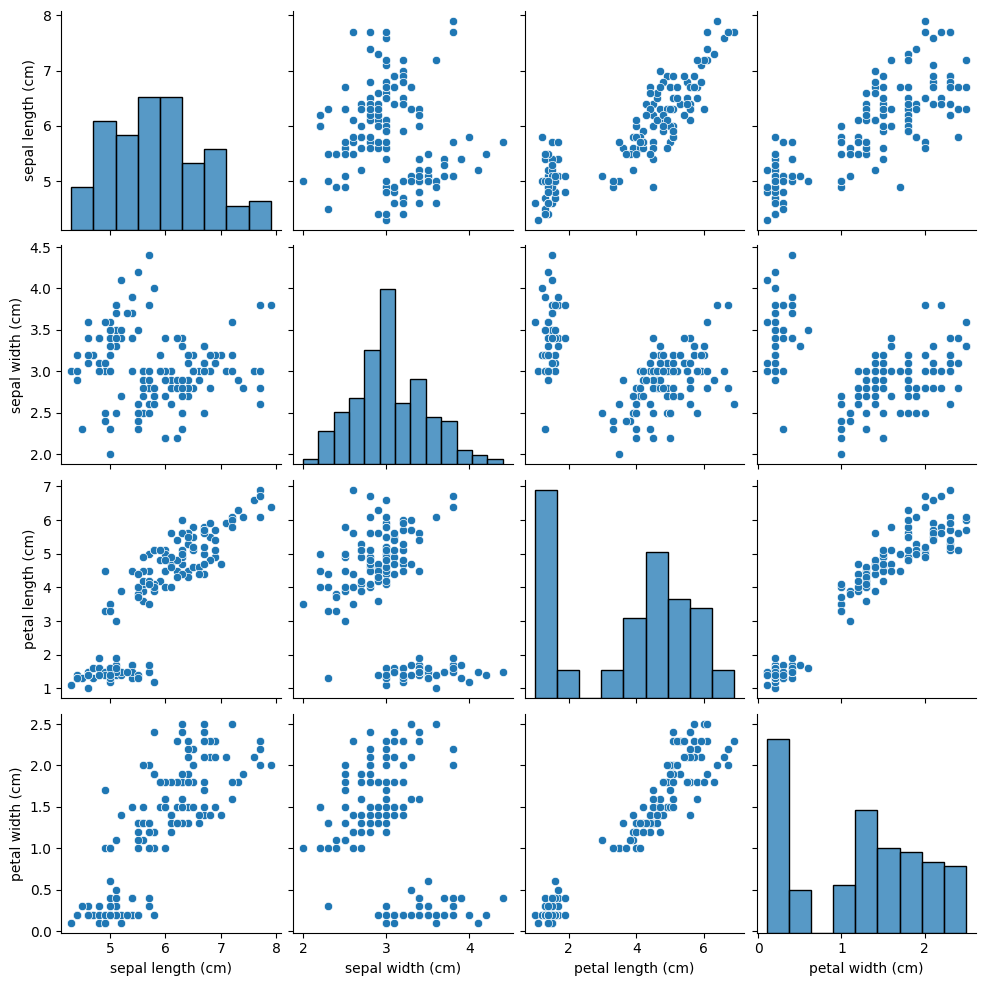

In [1]:
from myst_nb import glue

from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np

iris = datasets.load_iris()
iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_plot = sns.pairplot(iris)
iris_cov  = np.cov(iris.T)
glue("iris plot",iris_cov,display=False)

Another covariance matrix can be computed  by picking data line vectors  $\mathbf{x}_1 \ldots \mathbf{x}_m$, the resulting matrix is then:

$$
\frac{1}{m}
\mathbf{X}\mathbf{X}^\top = 
\frac{1}{m}
\begin{bmatrix}
\mathbf{x}_1 \mathbf{x}_1^\top & \cdots & \mathbf{x}_1 \mathbf{x}_n^\top \\
\vdots & \ddots & \vdots\\
\mathbf{x}_n \mathbf{x}_1^\top &\cdots&\mathbf{x}_n \mathbf{x}_n^\top
\end{bmatrix}
$$

which is a symmetric square matrix of size $n\times n$.

```{admonition} Example
:class: tip

The **term document matrix** is a classical method for encoding a collection of textual data sets.
For the Shakespeare example repeated here, it makes sense to compute both covariance matrices 

|         |Antony and Cleopatra| Julius Caesar | The Tempest | Hamlet | Othello | Macbeth |
|  ---    |         ---        |        ---    |       ---   |   ---  |    ---  |   ---   |
| Antony  |           157        |       73       |       0     |    0   |    0    |   1     |
| Brutus  |           4        |       157       |       0     |    2   |    0    |   0     |
| Caesar  |           232        |       227       |       0     |    2   |   1    |   8     |
|Calpurnia|           0        |       10       |       0     |    0   |    0    |   0     |
|Cleopatra|           57        |       0       |       0     |    0   |    0    |   0     |
| mercy   |           2        |       0       |       3     |    8   |    5    |   5     |
| worser  |           2        |       0       |       1     |    1   |    1    |   0     |

The matrix $ \frac{1}{n}\mathbf{X}^\top\mathbf{X}$ is again the covariances computed for column (document) variables
and the matrix  $\frac{1}{m}\mathbf{X}\mathbf{X}^\top$ is the matrix computed for line (term) variables.
```

## Singular Value Decomposition

The Singular Value Decomposition theorem generalizes the diagonalization and spectral theorems to rectangular matrices.

````{prf:theorem} SVD theorem 
:label: svd-theorem

The singular value decomposition theorem states that any matrix $\mathbf{X} \in \mathbf{R}^{n\times m}$ is decomposable as the product of 3 matrices:

$$
\mathbf{X} = \mathbf{U}\boldsymbol\Sigma \mathbf{V}^\top
$$

where $\mathbf{U}\in \mathbb{R}^{n\times r} ,\mathbf{V}^\top \in \mathbb{R}^{r\times m} $ and $\Sigma \in \mathbb{R}^{r\times r}$.
$\mathbf{U}$ is a matrix whose columns are orthogonal left singular vectors while  $\mathbf{V}^\top$ is a matrix whose lines are right singular vectors.
$\boldsymbol\Sigma$ is a diagonal matrix whose diagonal $\sigma_1\ldots \sigma_r$ are  non zero singular values.
````

The theorem is best interpreted by considering the covariance matrices:

- $\mathbf{X}^\top\mathbf{X} = (\mathbf{U}\boldsymbol\Sigma\mathbf{V}^\top)^\top (\mathbf{U}\boldsymbol\Sigma\mathbf{V}^\top) =  (\mathbf{V}\boldsymbol\Sigma\mathbf{U}^\top)  (\mathbf{U}\boldsymbol\Sigma\mathbf{V}^\top) =  \mathbf{V}\boldsymbol\Sigma \boldsymbol\Sigma\mathbf{V}^\top  $ 
- $\mathbf{X}\mathbf{X}^\top =  (\mathbf{U}\boldsymbol\Sigma\mathbf{V}^\top)  (\mathbf{U}\boldsymbol\Sigma\mathbf{V}^\top)^\top =  (\mathbf{U}\boldsymbol\Sigma\mathbf{V}^\top)
 (\mathbf{V}\boldsymbol\Sigma\mathbf{U}^\top) =  \mathbf{U}\boldsymbol\Sigma \boldsymbol\Sigma\mathbf{U}^\top$

Since the covariance matrices are symmetric matrices, by the spectral theorem such a matrix can be decomposed as $\mathbf{A} = \mathbf{P}\mathbf{D}\mathbf{P}^\top$. 
For both covariance matrices, we can conclude that $\boldsymbol\Sigma\boldsymbol\Sigma$ is a diagonal matrix containing :
- the eigenvalues of the covariances matrices. The eigenvalues are equal for both covariance matrices.
- the squared singular values. That is singular values are square roots of the eigenvalues of the covariance matrices

Like eigenvalues, it is *conventional* to order singular values in the diagonal of $\boldsymbol\Sigma$ from larger to lower: $\sigma_1 > \sigma_2 > \ldots > \sigma_r$. The columns of left and right singular matrices are ordered to make the corresponding singular vector match the position of the corresponding singular value.




```{admonition} Note (singular values and variance)
The covariance matrix decomposition $\mathbf{A} = \mathbf{PDP}^\top$ isolates the intrinsic variance of each variable in the diagonal matrix $\mathbf{D}$: these are the eigenvalues of the covariance matrix. 
Since singular values are square roots of the eigenvalues, they also represent variance: the larger the singular value, the larger the intrinsic variance of the variable.
```

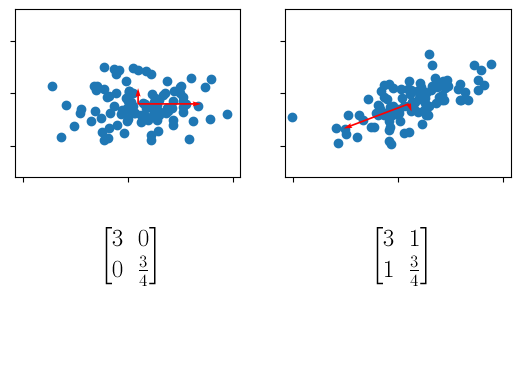

In [2]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
plt.rcParams.update({'font.size': 18})


diagdataset = np.random.multivariate_normal(np.array([0.5,-0.5]),np.array([[3.,0.],[0.,0.75]]), size=100).T
dataset     = np.random.multivariate_normal(np.array([0.5,-0.5]),np.array([[3,1.],[1.,0.75]]), size=100).T
fig,axis = plt.subplots(ncols=2,nrows=2)
axis[0,0].scatter(diagdataset[0],diagdataset[1]) 
axis[0,1].scatter(dataset[0],dataset[1]) 
axis[0,0].axis('equal')
axis[0,1].axis('equal')
axis[0,0].set_xlim(-4,4)
axis[0,1].set_xlim(-4,4)
axis[0,0].set_ylim(-4,4)
axis[0,1].set_ylim(-4,4)
vals,vecs = np.linalg.eigh(np.cov(diagdataset))
svecs = vecs[:,0]*vals[0],  vecs[:,1]*vals[1]
#axis[0,0].quiver(0.5, -0.5, svecs[0][0],svecs[0][1],angles='xy', scale_units='xy', scale=1, color='red',linewidth=4.)
#axis[0,0].quiver(0.5, -0.5, svecs[1][0],svecs[1][1],angles='xy', scale_units='xy', scale=1, color='red',linewidth=4.)
axis[0,0].quiver(0.5, -0.5, 3,0,angles='xy', scale_units='xy', scale=1, color='red',linewidth=4.)
axis[0,0].quiver(0.5, -0.5, 0,0.75,angles='xy', scale_units='xy', scale=1, color='red',linewidth=4.)
axis[0,0].set_xticklabels([])
axis[0,0].set_yticklabels([])
vals,vecs = np.linalg.eigh(np.cov(dataset))
svecs = vecs[:,0]*vals[0],  vecs[:,1]*vals[1]
axis[0,1].quiver(0.5, -0.5, svecs[0][0],svecs[0][1],angles='xy', scale_units='xy', scale=1, color='red',linewidth=4.)
axis[0,1].quiver(0.5, -0.5, svecs[1][0],svecs[1][1],angles='xy', scale_units='xy', scale=1, color='red',linewidth=4.)
axis[0,1].set_xticklabels([])
axis[0,1].set_yticklabels([])
axis[1,0].text(0.4,0.7,r'$\begin{bmatrix} 3 & 0\\ 0 & \frac{3}{4} \end{bmatrix}$')
axis[1,0].axis('off')
axis[1,1].text(0.4,0.7,r'$\begin{bmatrix} 3 & 1\\ 1 & \frac{3}{4} \end{bmatrix}$')
axis[1,1].axis('off')

glue("plot",fig,display=False)

This figure illlustrates the scatter plots of two bivariate data sets together with their respective covariance matrices. The red arrows are the eigenvectors of the covariance matrix scaled by their eigenvalues.
 The left plot is a dataset whose covariance matrix is diagonal : the covariance between variables is zero and the eigenvalues are found on the diagonal of the actual covariance matrix.
 The right plot is a dataset whose covariance matrix is not diagonal. The eigenvectors and eigenvalues provide both the directions of maximal variance and the actual values of the variances 
 in the diagonal matrix $\mathbf{D}$ resulting from spectral decomposition.

```{note}

In case $\mathbf{X}$ is a term-document matrix, the lines of $\mathbf{U}$ encode term vectors (or word embeddings) of size $r$ or smaller.
The columns of $\mathbf{V}^\top$ encode document vectors (or document embeddings) of size $r$ or smaller.

```

## Low Rank representation

SVD is generally used in its truncated form. In exact SVD, the value $r$ is set to be the number of singular values. 
In truncated SVD, $\boldsymbol\Sigma \in \mathbb{R}^{t\times t}$ with $t < r$. 
Since the singular values can be ordered according to their variance, greater variance comes first, lower comes last, in $\text{diag}(\boldsymbol\Sigma)$.
Removing the smaller singular values, with lower variance, removes the details of the input data.


```{figure} figs/svd.pdf
---
width: 500px
name: svd-fig
---
The Truncated SVD drops the singular values with least variance and their related left and right singular vectors
```

Remark that reducing $r$ to $t$ does not prevent from reconstructing an approximation of $\mathbf{X}$ with the same shape. We illustrate that with an image example.
The raccoon is a matrix $\mathbf{X}\in [0,255]^{n\times m}$ encoding the grayscale image pixelwise. Computing its SVD and then reconstructing the image by matrix multiplication
yields the following results:

|          $\mathbf{X}$ full                 |        $\hat{\mathbf{X}}$ (t=100)     |  $\hat{\mathbf{X}}$ (t=60)     |  $\hat{\mathbf{X}}$ (t=20)     |   $\hat{\mathbf{X}}$ (t=10)  |  $\hat{\mathbf{X}}$ (t=2) |
 | :-------------------------  |-----------------------------|---------------------- |----------------------- |----------------------|---------------------:|
| ![raccoon1](figs/raton_full.png)    | ![raccoon100](figs/raton100.png)     | ![raccoon60](figs/raton60.png)   | ![raccoon20](figs/raton20.png)   | ![raccoon10](figs/raton10.png) | ![raccoon2.png](figs/raton2.png)

where each picture keeps the $\sigma_1 \ldots \sigma_t$ larger singular values and their corresponding singular vectors to compute the reconstruction $\hat{\mathbf{X}}$.
As can be seen the low rank reconstruction creates a smoothing effect. The less singular values used in the reconstruction, the less variance is kept, the more approximative the image becomes.

When the matrix is not an image, but rather a count-based term-document matrix, SVD can be used in principle to generate either a denoised reconstruction of the text-document matrix, where ignoring small singular values
may remove random residual noise gathered when counting. But in practice, SVD is mostly used to :

- get low dimensional word or document embeddings, denoising the raw counts
- get 2D embeddings that can be used for graphical visualization

## Latent Semantic Analysis

The application of SVD to term-document matrices is called **Latent Semantic Analysis** (or LSA). LSA relies on a more elaborate encoding of the term-document matrices than the one introduced so far
by means of a TF-IDF transformation of the counts. This transformation is motivated by the particular pattern of count distributions gathered from textual data.

**Zipf law of word counts** Counts from text, provided a sufficiently large text, do invariably follow a distribution called the Zipf law of frequencies. 
Given a vocabulary $W$ and a counting function $c: W \mapsto \mathbb{N}$, a *ranked distribution* $w_1\ldots w_n$ orders the words according to their counts
such that $c(w_i) > c(w_j) \Leftrightarrow i < j$.  The Zipf law states that 

$$
c(w_r) \approx \frac{c(w_1)}{r}
$$

that is the expected counts of a word is approximatively inversely proportional to its rank. Zipf law has fundamental effects in the design of statistical models of language. 
It entails that few words are highly frequent and most of the vocabulary has low frequency. The specific consequences are:

- Highly frequent words are likely to be uninformative and to be present in every document
- Informative words are highly infrequent, half of the vocabulary has frequency 1, and may sometimes occur in documents "by chance", introducing "counting noise"

```{admonition} An example from Shakespeare 

Here is an example count pattern gathered from works of Shakespeare.
It is a typical Zipf pattern. The x axis is ordered according to the word rank and y axis is the word frequency (logarithmic scale).
```

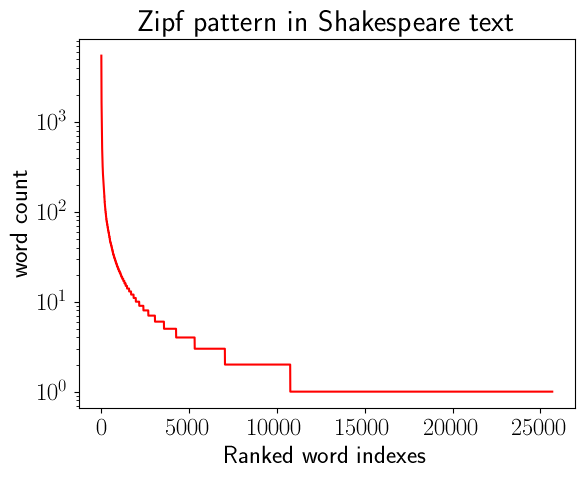

In [3]:
from myst_nb import glue
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

counts = Counter()
istream = open("figs/shakespeare.txt")
for line in istream:
	counts.update(line.split())

ranked = np.array(sorted([ count  for token,count in counts.most_common()],reverse=True)) 
plt.xlabel("Ranked word indexes")
plt.ylabel("word count")
plt.yscale('log')
plt.title("Zipf pattern in Shakespeare text")
p  = plt.plot(np.arange(len(ranked))+1,ranked,color='red')
glue("zipf",p,display=False)

The **TF-IDF**  aims at filling term document matrices by transforming the raw frequency counts. 
The transformation builds on two submetrics: True Frequency and Inverse Document Frequency.

- True Frequency of word $w$ in document $d$ is simply the number of occurrences of $w$ in $d$ divided by the number of tokens in $d$.
Let $c:W\times D\mapsto \mathbb{N}$ be a per document counting function.


$$
\text{TF}(w,d) = \frac{c(w,d)}{\sum_{w' \in d} c(w',d)} 
$$


- Inverse Document Frequency of a word $w$ in a collection of documents $D$ aims to measure the informativeness of the word $w$. Does it occur in every document or in a more specific subset ?

$$
\text{IDF}(w, D) = \log \frac{|D|}{ \sum_{d \in D}    \mathbb{1}[ c(w,d) > 0 ]  }
$$

The TF-IDF metric combines the two:

$$
\text{TF-IDF}(w,d,D) = TF(w,d) \times IDF(w,D)
$$

```{admonition} Note

Observe the IDF function for a collection $D$ of 100 documents. The more a word occurs in many different documents the more the IDF function downweights  its True Frequency towards 0

```

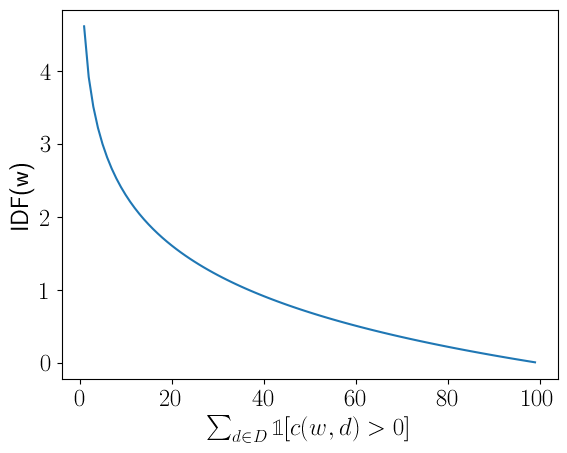

In [4]:
from myst_nb import glue
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{bbold}'

idf_fig, ax = plt.subplots()
x = np.arange(1,100)
y = np.log(100/x)
plt.xlabel(r'$ \sum_{d \in D}   \mathbb{1} [ c(w,d) > 0 ]  $')
plt.ylabel('IDF(w)')
ax.plot(x,y)
glue("IDF",idf_fig,display=False)
matplotlib.rcParams['text.usetex'] = False

## Example in Python

In [5]:
import string
import wikipedia
from collections import Counter
from sklearn.feature_extraction import text

#Gather data
wikipages = ["Games of Thrones", "Harry Potter", "The Lord of the Rings", "Algorithm", 
             "Artificial Intelligence","Computer Science", "Linguistics","Roswell Incident",
			 "Solar System","Milky Way","Tropical cyclone","Typhoon",
			 "Tsunami","Wine","Beer"]

dataset   = [wikipedia.page(page,auto_suggest=False).summary for page in wikipages]


#Preprocessing (removes tokens with non ascii encoding and stop words)
tokenized_set = []
for page in dataset:
    page   = page.lower()
    tokens = [token for token in page.split() 
	        if all(char in string.ascii_letters for char in token)
			and token not in text.ENGLISH_STOP_WORDS]
    tokenized_set.append(tokens)

#Vocabulary
vocabulary = set(token for page in tokenized_set for token in page) 
idx2word   = list(vocabulary)
word2idx   = {token:idx for idx,token in enumerate(idx2word)}


#Term-Document matrix
import numpy as np

tdmat = np.zeros((len(idx2word),len(wikipages)))


##TF
for pidx, page in enumerate(tokenized_set):
	counts = Counter(page)
	total  = sum(counts.values())
	for word,count in counts.most_common():
		tdmat[word2idx[word],pidx] = count/total

##TF-IDF
D = len(tokenized_set)
for idx,line in enumerate(tdmat):
	idf = np.log(D / (np.count_nonzero(line)))
	tdmat[idx] *= idf
		
#prints the first few lines of the term document matrix
print(tdmat[:5]) 


# Computes the SVD
from numpy.linalg import svd

U, S, Vt = svd(tdmat)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.02820886]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.00988339 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.0188059  0.         0.        ]
 [0.         0.01471766 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.02067214
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


that's it ! We have both the term document matrix with TF-IDF values and the SVD decomposition.

### LSA and visualisation

Given the term document matrix we can compute the SVD and use it for **visualisation** of words or documents in two dimensions:

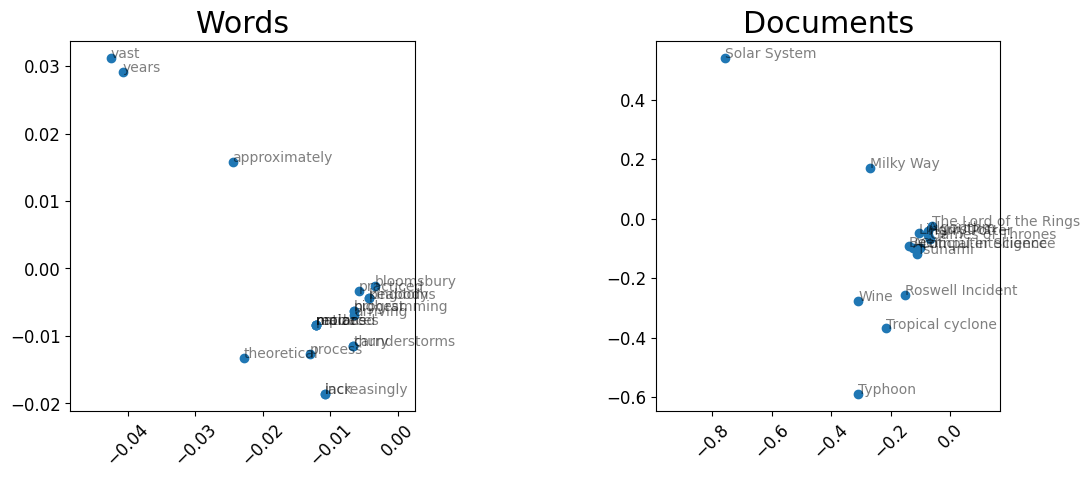

In [6]:
#Truncation
k = 2
Uk   =  U[:,:k]
Sk   =  S[:k]
Vtk  =  Vt[:k,:]

#Plotting (20 first words only, all documents)
import matplotlib.pyplot as plt
import matplotlib

mwords=20  
fig,ax = plt.subplots(ncols=2)
x,y    = Uk[:mwords,0],Uk[:mwords,1]
ax[0].scatter(x,y)
ax[0].axis('equal')
ax[0].set_title('Words')
ax[0].tick_params(axis='x', labelsize=12,labelrotation=45)
ax[0].tick_params(axis='y', labelsize=12)
for x,y,label in zip (x,y,idx2word):
	ax[0].text(x,y,label,fontsize=10,alpha=0.5)


x,y    = Vtk[0,:],Vtk[1,:]
ax[1].set_title('Documents')
ax[1].scatter(x,y)
ax[1].axis('equal')
ax[1].tick_params(axis='x', labelsize=12,labelrotation=45)
ax[1].tick_params(axis='y', labelsize=12)
for x,y,label in zip (x,y,wikipages):
	ax[1].text(x,y,label,fontsize=10,alpha=0.5)

fig.set_figwidth(12)
plt.subplots_adjust(wspace=0.7)


These 2D plots use only the first 2 singular values of SVD. This drops a lot of variance from the original high dimensional data
and are to be viewed as mirrors of high dimensional data but as distorting mirrors. 

To get a better idea of the distortion importance, it is also worthwhile to look at other viewing methods for high dimensional covariance matrices. Here we provide a method for viewing the Document x Document covariance matrix under different levels of approximation (truncation)

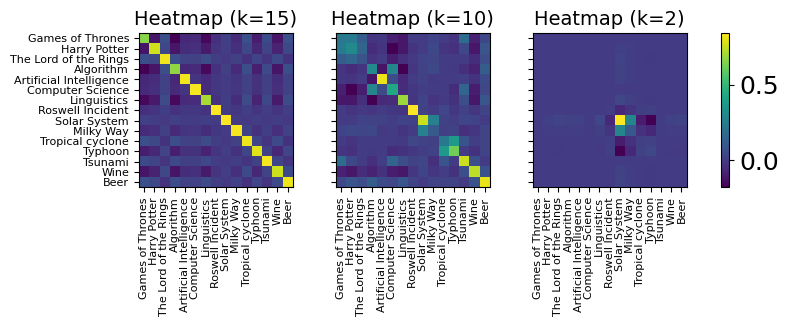

In [7]:
def covariance_plot(document_matrix,document_labels,fig,axis,title,center=False,colorbar=False):
    """
	Args:
	   document_matrix (array): array whose columns are document vectors
	   document_labels (list) : list of strings with document names
	   fig    : the figure where to plot the covariance matrix
	   axis   : the axis where to plot the covariance matrix
	   center : if true performs centering of the document vectors
    """
    N = len(document_labels)
    assert N == document_matrix.shape[1]

    if center:
        document_matrix = document_matrix  - document_matrix.mean(axis=0)		
		
    covar = document_matrix.T @ document_matrix
	
    im = axis.imshow(covar)
    axis.set_xticks(np.arange(N))
    axis.set_yticks(np.arange(N))
    axis.set_xticklabels(document_labels,rotation = 90,fontsize=8)
    axis.set_yticklabels(document_labels, fontsize=8)
    axis.set_title(title,fontsize=14)
    return im

def truncate(U,S,Vt,k):
	return (U[:,:k], S[:k],Vt[:k,:])

fig, axes = plt.subplots(ncols=3, figsize = (9,2),sharey=True)
covariance_plot(Vt,wikipages,fig,axes[0],"Heatmap (k=15)",center=True)
covariance_plot(truncate(U,S,Vt,10)[-1],wikipages,fig,axes[1],"Heatmap (k=10)",center=True)
image = covariance_plot(truncate(U,S,Vt,2)[-1],wikipages,fig,axes[2],"Heatmap (k=2)",center=True,colorbar=True)

cbar = fig.colorbar(image, ax=axes.ravel().tolist())

### Topic analysis

Latent semantic analysis is also used to identify **latent topics** (or latent concepts) in documents.
Each element of a document vector (a column of the *topic-document matrix* $\mathbf{V}^\top$) can be interpreted as an indicator of a topic representation in a document. 

Considering the "Milky Way" document vector in a non truncated SVD we can get a plot of the topics represented in the Milky way document:

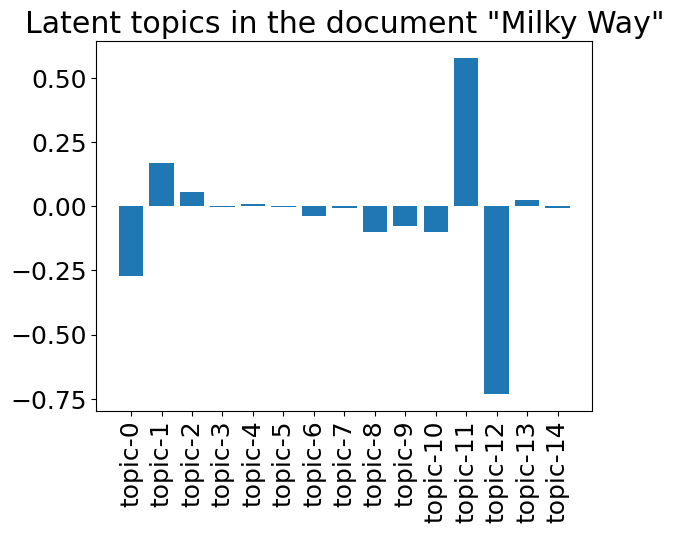

In [8]:

docidx = wikipages.index('Milky Way')
docvec = Vt[:,docidx]

plot  = plt.bar( np.arange(0,len(docvec)) ,docvec,tick_label = [f'topic-{d}' for d in range(0,len(docvec))] )
ticks = plt.xticks(rotation=90)
title = plt.title('Latent topics in the document "Milky Way"')

Now how do we interpret these latent topics ? For the *topic documents matrix* $\mathbf{V}^\top$ each line represents a latent topic vector while for the *term-topic matrix* $\mathbf{U}$ each *i*-th column represents the latent topic corresponding to the *i*-th line in $\mathbf{V}^\top$. We can get elements of interpretation of the latent topic by retrieving terms with the highest scores in the topic.  Here we attempt to get an interpretation for topic-3 and topic-9.

In [9]:
#Matching terms with their scores for 3rd topic
scored_terms = zip(U[:,3], idx2word)

k = 10
print(f'* Topic-3 top {k} terms *')
for score,term in  sorted(scored_terms,reverse=True)[:k]:
   print(f'{term} : {score}')

print()

#Matching terms with their scores for the 9th topic
scored_terms = zip(U[:,9], idx2word)

k = 10
print(f'* Topic-9 top {k} terms *')
for score,term in  sorted(scored_terms,reverse=True)[:k]:
   print(f'{term} : {score}')

* Topic-3 top 10 terms *
wine : 0.30335149588403454
tropical : 0.11144972173143511
typhoon : 0.07439588867471726
largest : 0.058252205505190766
pacific : 0.05551065763047554
cyclone : 0.0506462204316339
viticulture : 0.05055858264733908
varieties : 0.05055858264733908
styles : 0.05055858264733908
connection : 0.05055858264733908

* Topic-9 top 10 terms *
tsunamis : 0.34464931035997226
tsunami : 0.34464931035997226
waves : 0.1716188164431531
large : 0.17095644030634977
computer : 0.15964125306152321
ocean : 0.13468844166469815
generated : 0.13071529020420575
resemble : 0.11488310345332407
normal : 0.11488310345332407
generate : 0.11488310345332407
